In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.patches import Ellipse
import sep

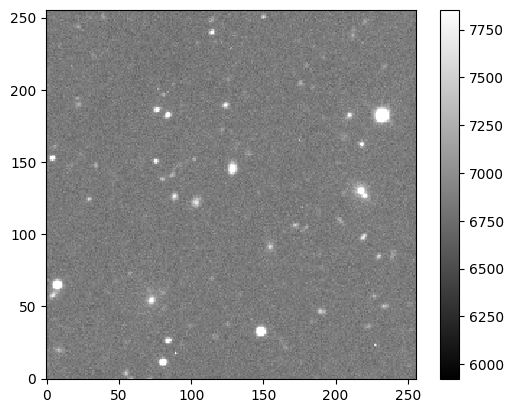

In [11]:
# read image into standard 2-d numpy array
url = 'https://github.com/kbarbary/sep/raw/v1.0.x/data/image.fits'
hdu_list= fits.open(url)
data=hdu_list[0].data 

# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('figure1.png')
plt.colorbar();

In [12]:
bkg = sep.Background(data)

In [13]:
print (bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [14]:
bkg_image = bkg. back()

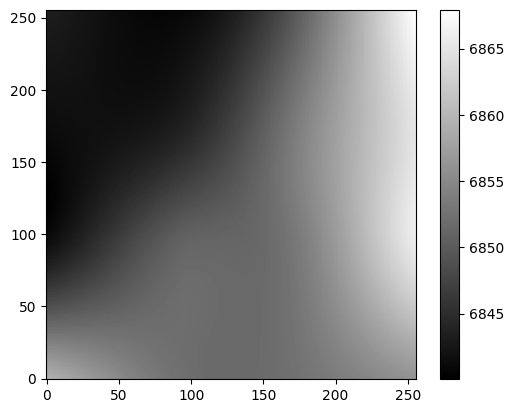

In [15]:
plt. imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('figure2.png')
plt. colorbar();

In [16]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

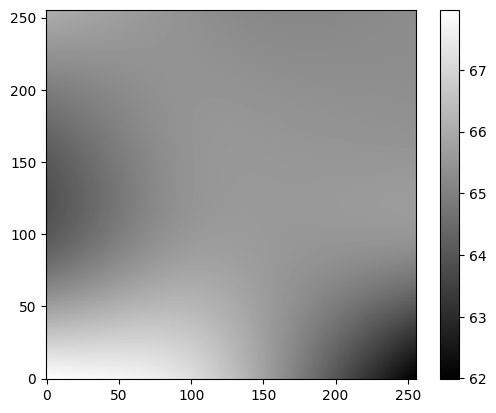

In [17]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('figure3.png')
plt.colorbar();

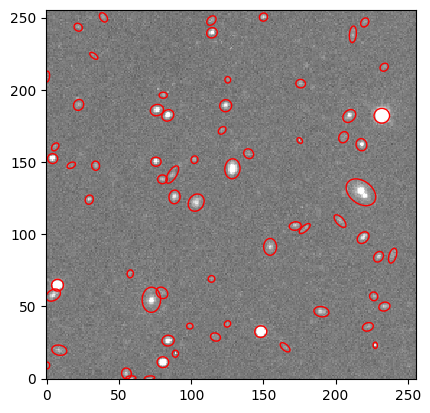

In [18]:
# Download an example FITS file from the SEP GitHub account
url = 'https://github.com/kbarbary/sep/raw/v1.0.x/data/image.fits'
hdu_list = fits.open(url)
data = hdu_list[0].data

# Measure the background and subtract it from the data
bkg = sep.Background(data)
data_sub = data - bkg

# Detect sources in the subtracted data
# Use a detection threshold of 1.5 times the global root mean square (rms) error
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Plot the original image with detected sources highlighted
fig, ax = plt.subplots()

# Normalize the image data for display
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s, origin='lower')

# Plot ellipses around the detected sources
for i in range(len(objects)):
    ellipse = Ellipse(
        xy=(objects['x'][i], objects['y'][i]),
        width=6 * objects['a'][i],
        height=6 * objects['b'][i],
        angle=objects['theta'][i] * 180. / np.pi
    )
    ellipse.set_facecolor('none')
    ellipse.set_edgecolor('red')
    ax.add_artist(ellipse)
plt.savefig('figure4.png')
# Show the plot
plt.show()